# Signal processing Code Fragment <br>
**Lecture for Digitalisation in the Industry WS 21/22<br>
University Stuttgart, please refer to the original source under: <br>
https://new.pythonforengineers.com/blog/audio-and-digital-signal-processingdsp-in-python/
from 10.12.2021**


### Importieren der benötigten Python-Pakete

**Numpy:**<br>
Allgemeine numerische Bibliothek

**Wave:**<br>
Das wave-Modul bietet eine komfortable Schnittstelle zum WAV-Tonformat. Es unterstützt keine Komprimierung/Dekomprimierung, aber es unterstützt Mono/Stereo.

**Struct:**<br>
Dieses Modul führt Konvertierungen zwischen Python-Werten und C-Strukturen durch, die als Python-bytes Objekte dargestellt werden

**Matplotlib:**<br> 
Dieses Modul erstellt 2-D Grafiken und Abbildungen


In [1]:
import numpy as np
import wave
import struct
import matplotlib.pyplot as plt

### Erstellung Sinuswelle<br>
Deklarieren der benötigten Parameter:<br>
- Die Frequenz ist frei wählbar, wir verwenden 1000 Hz<br>
- Die Sampling Rate von 48000 ist der Wert, welcher in Audiogeräten verwendet wird.
- Die Amplitude definiert die Lautstärke des Geräuschs. Der Höchstwert, welcher mit 16 Bit dargestellt werden kann ist ca. 32000. Wir wählen ein Geräuscht das die Hälfte der maximalen Lautstärke liefert also 16000.<br>

Erstellen der Sinusschwingung:

<br>

1. Die Funktion *range()* generiert eine Liste mit Zahlen von 0 bis num_samples (0 bis 47999)
2. Zu jedem *x* wird der zugehörige Sinuswert gespeichert
3. Die Klammer wandelt die erstellte Datei sine_wave in eine Liste




In [2]:
frequency = 1000
sampling_rate = 48000.0
num_samples = 48000
amplitude = 16000

sine_wave = [np.sin(2 * np.pi * frequency * x/sampling_rate) for x in range(num_samples)]

Schauen wir uns die erstellte Liste in einem Bereich von [0,300] an: <br> Der Befehl *plt.figure(figsize=(18, 5))* stellt zur besseren Darstellung die Plotbreite (18) und Plothöhe (5) ein.

In [3]:
plt.figure(figsize=(18, 5))
plt.plot(sine_wave[:300])

### Wave - Datei erstellen<br>
Nun schreiben wir die erstellte Schwingung in eine .wav Datei, damit sie von Audioplayern gelesen werden kann.<br>
Dafür müssen zunachst weitere Parameter festgelegt werden:
- *nframes* ist die Anzahl der Frames / Samples
- *comptype* und *compname* signalisieren beide dasselbe: Die Daten sind nicht komprimiert
- *nchannels* beschreibt die Anzahl der Kanäle
- *sampwidth* ist die Samplebreite in Bytes (2 Byte = 16 Bit)

In [4]:
nframes=num_samples
comptype="NONE"
compname="not compressed"
nchannels=1
sampwidth=2

Nun können wir mithilfe des anfangs importierten Wave - Pakets die .wav Datei erstellen.<br>
- *wave.open('test.wav', 'w')* erstellt eine wave Datei namens "test.wav"
- *wav_file.setparams()* ordnet die zuvor benötigten Parameter der .wav Datei zu

In [5]:
wav_file=wave.open('test.wav', 'w')
wav_file.setparams((nchannels, sampwidth, int(sampling_rate), nframes, comptype, compname))

Nun schreiben wir unsere Sinuswerte in die .wav Datei:

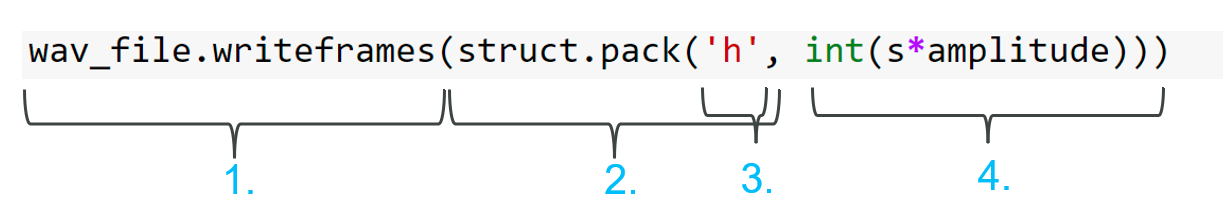

1. Der Befehl *writeframes()* schreibt die Sinuswerte in die .wav Datei
2. Der Befehl *struct* nimmt unsere Zahlenliste und wandelt sie in einen Binärcode um. Das *h* im Code bedeutet eine 16-Bit-Zahl
3. Der Befehl struct.pack wird gleich anhand eines Beispiels erklärt
4. Hier werden die Sinuswerte mit der Amplitude multipliziert. Dies definiert die Lautstärke des Tons



In [6]:
for s in sine_wave:
    wav_file.writeframes(struct.pack('h', int(s*amplitude)))

### Kleiner Exkurs: Die *struct.pack* Funktion<br>
Um zu verstehen was struct.pack macht, nehmen wir den sin(0,5) und multiplizieren ihn mit 16000 um eine Festkommazahl zu erhalten.

In [7]:
import numpy as np
np.sin(0.5)

0.479425538604203

In [8]:
0.479*16000

7664.0

Schauen wir uns an, was *struct.pack* macht:

In [9]:
import struct
struct.pack('h',7644)

b'\xdc\x1d'

Die Funktion hat die Dezimalzahl (7644) in zwei Hexidezimalzahlen (dc , 1d) umgewandelt. Dieses Format kann von Audioplayern gelesen werden.<br>
Somit habe wir nun eine Datei test.wav, in welcher die Sinuswerte mit gewünschter Amplitude (Lautstärke) und in Hexadezimalform gespeichert sind.

Öffnen wir die Datei mit dem Audioprogramm Audacity, wird das Geräusch und die einzelnen Sampling-Points abgebildet:
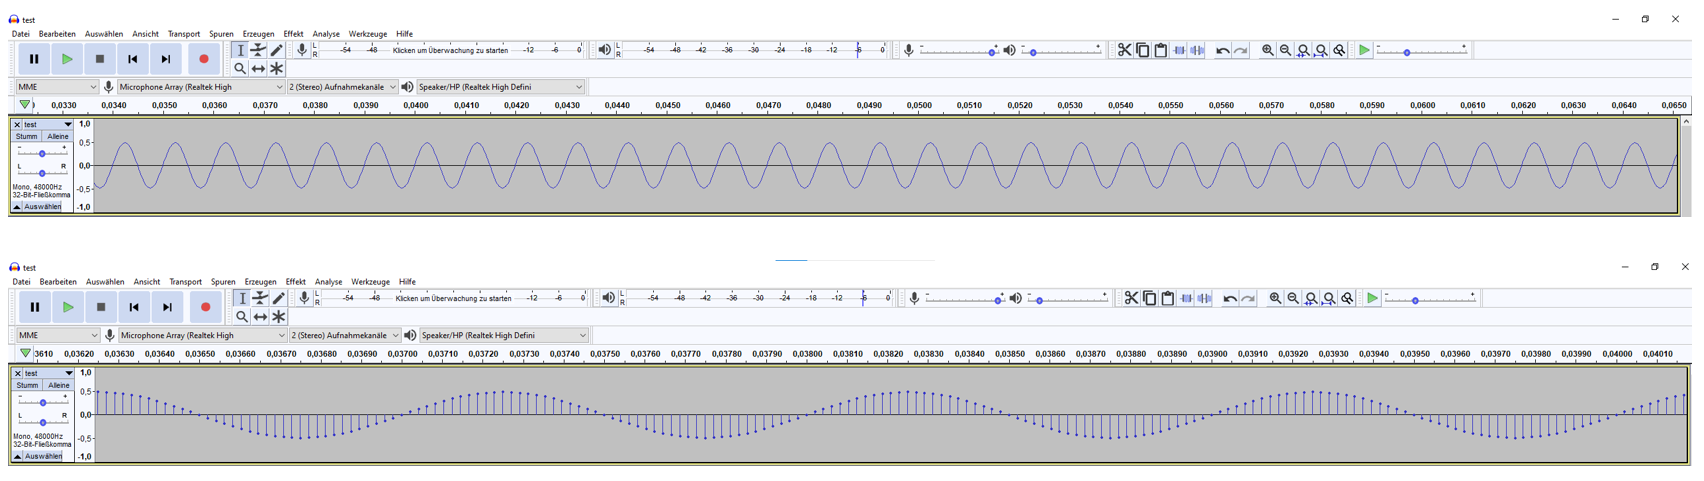

Somit haben wir nun ein Geräusch, welche untersucht werden kann.


### Transformation in den Frequenzbereich<br><br>
Wir wollen nun die der Schwingung enthaltenen Frequenzen ermitteln, dies geschiet mittels einer Fouriertransformation.
Ein Geräusch besteht aus der Überlagerung vieler Frequenzen. Die Fouriertransformation zerlegt diese Überlagerung in seine Einzelfrequenzen, welche mathematisch einfacher zu beschreiben sind.


Die Fouriertransformation wird mit dem Befehl *fft* (Fast Fourier Transformation) durchgeführt. Diese ist in Python nicht auf eine .wav Datei anwendbar. Somit müssen wir die Sinuswerte zunächst in ein passendes Format bringen:<br>
Deklarieren der nötigen Parameter:

In [10]:
frame_rate = 48000
num_samples = 48000

Nun erstellen wir eine neue Datei "data", in welche wir die hexagonalen Sinuswerte speichern:

In [11]:
infile = "test.wav"
wav_file = wave.open(infile, 'r')
data = wav_file.readframes(num_samples)
wav_file.close()

Da die *fft*-Funktion im Dezimalsystem mit Arrays arbeitet, muss die Datei "data" mittels folgender Befehle angepasst werden: Sollen wir hier schriftlich näher auf die Funktion eingehen oder erklären wir das während der Vorlesung?

In [12]:
data = struct.unpack('{n}h'.format(n=num_samples), data)
data = np.array(data)

Nun ist die *fft*-Funktion auf "data" anwendbar. Die Ergebnisse werden in eine neue Datei "fft_data" geschrieben.

In [13]:
data_fft = np.fft.fft(data)

### Kleiner Exkurs: Die Fouriertransfomation<br>
Um das Ergebnis der Fouriertransformation zu erläutern, sehen wir uns die ersten 8 Werte der Datei "data_fft" an

In [14]:
data_fft[:8]

array([13.         +0.j        ,  8.44107682 -4.55121351j,
        6.2469663 -11.98027552j,  4.0951376  -2.63009999j,
       -0.87934285 +9.52378503j,  2.62608334 +3.58733642j,
        4.89671762 -3.36196984j, -1.26176048 +3.0234555j ])

Hierbei zeigt sich, dass die fft Funktion die Werte in komplexer Form schreibt.
<br> Für eine Aussage über die im Signal enthaltenen Frequenzen ist nur der Realteil relevant.
<br> Um die reellen Werte zu erhalten hat numpy eine Funktion:


In [15]:
frequencies = np.abs(data_fft)

Die Datei "frequencies" enthält nurnoch die reellen Teile der Fouriertransformation.<br>
Betrachten wir nun die Werte für x = 0; 1; 1000;

In [16]:
print(frequencies[0])
print(frequencies[1])
print(frequencies[1000])

13.0
9.58985517018681
383987426.14432806


Die *fft*-Funktion gibt zu jedem x-Wert das **Häufigkeitselement** der zugehörigen Frequenz aus.
Da wunser synthetisch erzeugtes Signal nur eine Frequenz von 1000 Hz besitzt, ist das Häufigkeitselement dieser Frequenz maximal, wogegen sich die Häufigkeit der anderen Frequenzen gegen Null beläuft.

Zur Veranschaulichung plotten wir nun die Schwingung im Zeit- und Frequenzbereich:<br> 
- Der Befehl *plt.subplot(a,b,c)* ermöglicht mehrere Plots in einem file. Diese werden in einem  a × b Gitter angeordnet, c ordnet den darauffolgenden Plot seiner Position zu.
- Der Befehl *plt.plot(file[:x])* plottet das file bis zum Datenpunkt x
- Die Funktion *plt.title(“x“)* gibt dem Plot den Titel x
- Die Funktion *plt.xlim(a,b)* beschränkt den geplotteten Bereich der x-Achse von a bis b

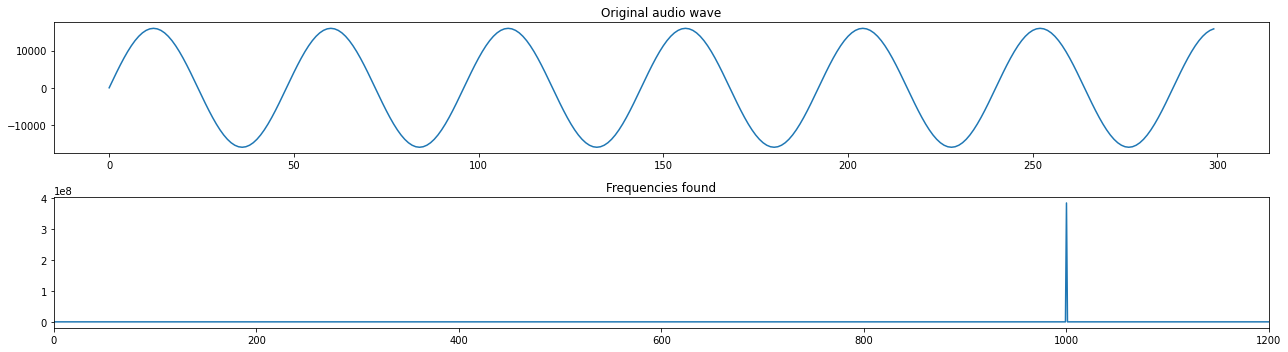

In [17]:
plt.figure(figsize=(18, 5))
plt.subplot(2,1,1)
plt.plot(data[:300])
plt.title("Original audio wave")
plt.subplot(2,1,2)
plt.plot(frequencies)
plt.title("Frequencies found")
plt.xlim(0,1200)
plt.tight_layout()
plt.show()

Damit haben wir ein Programm erstellt, welches ein zeitdiskretes Schwingungssignal in seine Frequenzanteile zerlegt.<br>
Da es sich um ein generiertes Signal handelt enthält dieses nur die definierte Frequenz. In der realen Anwendung liegen Schwingungen immer als Überlagerung mehrerer Frequenzen vor.<br>
Um dies zu simulieren bauen wir ein Rauschen mit ein.


**Verunreinigung durch Rauschen**
<br>     
**Warum müssen Signale bereinigt werden?**
In der Mess- und Signaltechnik versteht man unter Rauschen alle jene Anteile am Signal, die keine brauchbare Information enthalten. Es sind daher durchweg unerwünschte Anteile. Rauschen kann viele Ursachenhaben:
- **Thermisches Rauschen, Nyquist-Rauschen:**<br>                                                     Durch   die   zufällige   Bewegung   von   Ladungsträgern   (Elektronen,   Atome,   Moleküle)   in   einem   Leiter entstehen   zufällige   Spannungsschwankungen   aller   Frequenzen.   Ein   Widerstand  ist   also   eine Rauschspannungsquelle.

- **Schrotrauschen, Shot Noise:**<br>                                                                 Spontane   Änderungen   des   Bewegungszustandes   von   Ladungsträgern   z.B.   durch   den   Tunneleffekt   in Halbleitern führen zu Ladungs- und Spannungsschwankungen.
- **Quantisierungsrauschen:**<br>                                                                     Bei der Digitalisierung eines analogen Signals können die Abweichungen zwischen dem Wert des analogen und des digitalen Signals bis zur Hälfte einer Stufenhöhe betragen.

Nun erstellen wir eine Rauschfrequenz mit 50 Hz. Das Vorgenen ist analog zur Erstellung des 1000 Hz Signals.

In [18]:
frequency = 1000
noisy_freq = 50
num_samples = 48000
sampling_rate = 48000.0

sine_wave = [np.sin(2 * np.pi * frequency * x1 / sampling_rate) for x1 in range(num_samples)]
sine_noise = [np.sin(2 * np.pi * noisy_freq * x1/  sampling_rate) for x1 in range(num_samples)]

sine_wave = np.array(sine_wave)
sine_noise = np.array(sine_noise)

Nun werden die beiden Signale durch addition zu einem überlagerten Signal "combined_signal":

In [19]:
combined_signal = sine_wave + sine_noise

Das plotten der drei vorliegenden Schwingungen ergibt folgendes Bild:

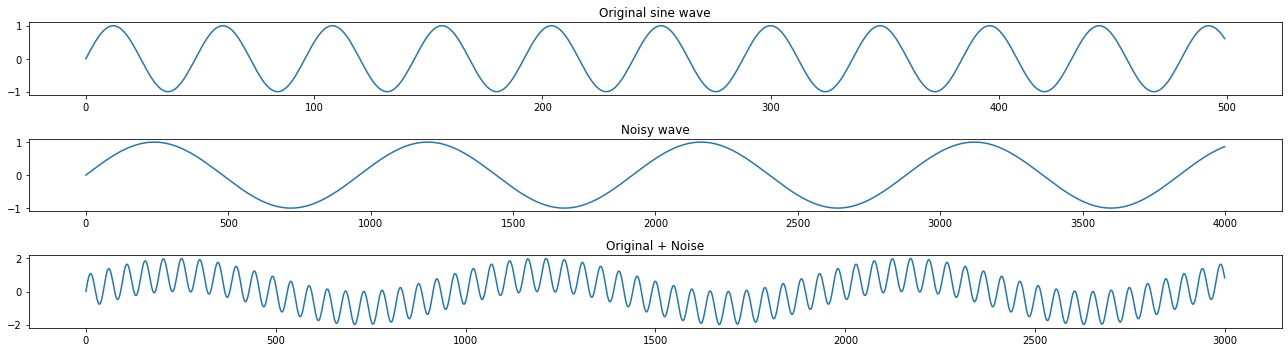

In [20]:
plt.figure(figsize=(18, 5))
plt.subplot(3,1,1)
plt.title("Original sine wave")
plt.subplots_adjust(hspace=.5)
plt.plot(sine_wave[:500])
plt.subplot(3,1,2)
plt.title("Noisy wave")
plt.plot(sine_noise[:4000])
plt.subplot(3,1,3)
plt.title("Original + Noise")
plt.plot(combined_signal[:3000])
plt.tight_layout()
plt.show()

Nun schauen wir uns das kombinierte Signal im Frequenzbereich an:

In [21]:
data_fft = np.fft.fft(combined_signal)
freq = (np.abs(data_fft[:len(data_fft)]))

plt.figure(figsize=(18, 5))
plt.plot(freq)
plt.title("Before filtering: Will have main signal (1000Hz) + noise frequency (50Hz)")
plt.xlim(0,1200)

(0.0, 1200.0)

### Erstellen eines Hochpassfilters<br>
Das Bereinigen von störfrequenzbehafteten Signalen ist eine zentrale Herausforderung der Informations- und Kommunikationstechnik. Wir stellen nun eine simple Möglichkeit vor, wie diese Bereinigung in Python durchgeführt werden kann.<br>
Dieser Filter kann in einer Zeile realisiert werden:



1. Die for/else Schleife prüft, ob der Wert in der Datei freq zwischen 950 und 1050 liegt. Wenn ja wird der Wert in den neuen Array filtered_freq übernommen, falls nicht wird der Wert 0 vergeben. (Der Code wäre um ein Vielfaches komplexer, wüssten wir nicht in welchem Bereich die gewünschte Frequenz liegt.
2. Die Funktion enumerate(freq) nimmt den index des Arguments als Laufindex der for Schleife und schreibt diesem den Wert der aktuellen Iteration zu. Das Argument der Funktion (freq) ist die zuvor erstellte Liste der aus der Fouriertransformation resultierenden Wahrscheinlichkeitswerte der einzelnen Frequenzen des kombinierten Signals:


In [22]:
filtered_freq = [f if (950 < index < 1050 and f > 1) else 0 for index, f in enumerate(freq)]

Schauen wir uns nun die enthaltenen Frequenzen des kombinierten Signals an:

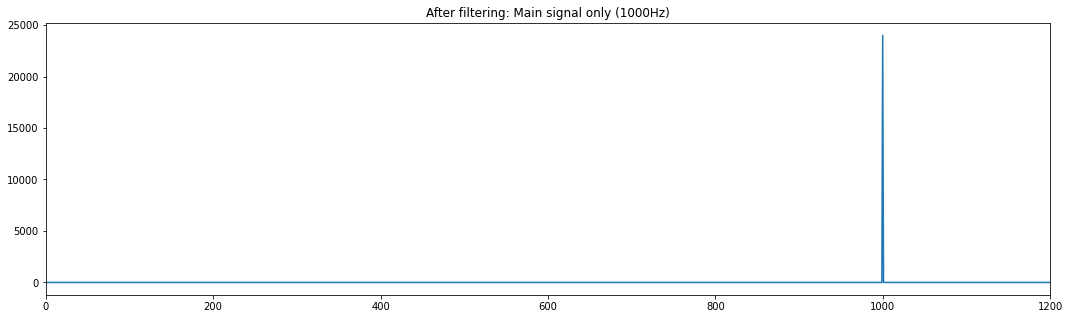

In [23]:
plt.figure(figsize=(18, 5))
plt.plot(filtered_freq)
plt.title("After filtering: Main signal only (1000Hz)")
plt.xlim(0,1200)
plt.show()
plt.close()

Welche Auswirkungen hat die Bereinigung des Signals im zeitdiskreten Bereich? Hierfür müssen wir die eben erstellte Datei *filtered_freq* mittels der *ifft*-Funktion (inverse Fouriertransformation) zurück in den Zeitbereich transformieren:

In [24]:
recovered_signal = np.fft.ifft(filtered_freq)

Zum Vergleich plotten wir nun das ursprüngliche sowie das verunreinigte und bereinigte Signal:

C:\Users\ThomasRueter\Miniconda3\envs\tf\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


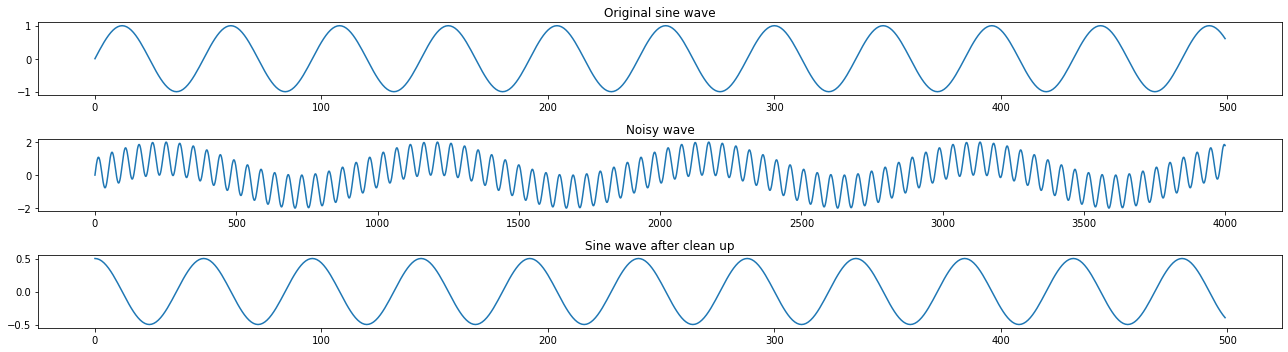

In [25]:
plt.figure(figsize=(18, 5))
plt.subplot(3,1,1)
plt.title("Original sine wave")
plt.subplots_adjust(hspace=.5)
plt.plot(sine_wave[:500])
plt.subplot(3,1,2)
plt.title("Noisy wave")
plt.plot(combined_signal[:4000])
plt.subplot(3,1,3)
plt.title("Sine wave after clean up")
plt.plot((recovered_signal[:500]))
plt.tight_layout()
plt.show()